install flair - also install pytorch

In [1]:
#!pip install flair

In [1]:
# import flair
import flair

import pandas as pd 
import numpy as np
import seaborn as sns 

In [2]:
df = pd.read_csv("offensive_vs_non_offensive_mini_dataset.csv")
df.head()

,Unnamed: 0,clean_tweet,class,labels
0,0,look at what you just said lls new era girl ...,1,offensive
1,1,driving the fucktardmobile tranny slips and a...,1,offensive
2,2,if i ever put ma trust ina bitch i will alwa...,1,offensive
3,3,stop twatching me bitch,1,offensive
4,4,you know bitches be mad when they be lik...,1,offensive


c:\users\milind.desktop-gbr1bs2\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

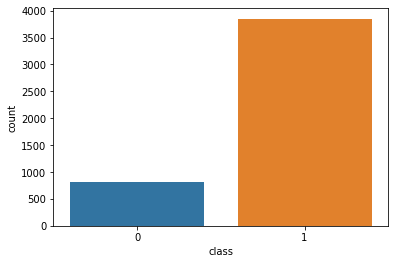

In [3]:
sns.countplot(df['class'])

In [4]:
df1 = df[['clean_tweet','labels']]
df1.columns  = ['text','labels']
df1

,text,labels
0,look at what you just said lls new era girl ...,offensive
1,driving the fucktardmobile tranny slips and a...,offensive
2,if i ever put ma trust ina bitch i will alwa...,offensive
3,stop twatching me bitch,offensive
4,you know bitches be mad when they be lik...,offensive
...,...,...
4666,this bitch gonna steal a police uniform and th...,offensive
4667,if california chrome does not go off at even m...,offensive
4668,i do not love you hoes,offensive
4669,lmaoooo white people lmaoo filth ...,offensive


In [5]:
# For FastText
df_fst = df1.copy()
df_fst['labels'] = '__label__' + df_fst['labels'].astype(str)
df_fst = df_fst[['labels','text']]
df_fst

,labels,text
0,__label__offensive,look at what you just said lls new era girl ...
1,__label__offensive,driving the fucktardmobile tranny slips and a...
2,__label__offensive,if i ever put ma trust ina bitch i will alwa...
3,__label__offensive,stop twatching me bitch
4,__label__offensive,you know bitches be mad when they be lik...
...,...,...
4666,__label__offensive,this bitch gonna steal a police uniform and th...
4667,__label__offensive,if california chrome does not go off at even m...
4668,__label__offensive,i do not love you hoes
4669,__label__offensive,lmaoooo white people lmaoo filth ...


Spliting Dataset into train, test, dev

In [6]:
train, test, dev = np.split(df1,[int(.6*len(df1)),int(.8*len(df1))])

In [7]:
# Create A Folder for the csv
!mkdir -p data

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file data already exists.
Error occurred while processing: data.


In [8]:
train.to_csv("data/train.csv")
test.to_csv("data/test.csv")
dev.to_csv("data/dev.csv")

In [9]:
# Spliting FastText Format Dataset into 3
# Using Numpy
train_fst, test_fst, dev_fst = np.split(df_fst,[int(.6*len(df_fst)),int(.8*len(df_fst))])

In [10]:
# Store in a  folder
!mkdir -p data_fst

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file data_fst already exists.
Error occurred while processing: data_fst.


In [11]:
train_fst.to_csv("data_fst/train.csv",sep='\t',index=False,header=False)
test_fst.to_csv("data_fst/test.csv",sep='\t',index=False,header=False)
dev_fst.to_csv("data_fst/dev.csv",sep='\t',index=False,header=False)

Building Corpus

In [12]:
from flair.datasets import ClassificationCorpus,CSVClassificationCorpus
from flair.data import Corpus

In [13]:
column_name_map = {2:"label_topic", 1:"text"}
data_folder = 'data/'
data_folder_fst = 'data_fst/'

In [14]:
# Create Corpus For CSV
corpus_csv: Corpus = CSVClassificationCorpus(data_folder, column_name_map=column_name_map, label_type='label_topic',  skip_header=True, delimiter=',')

2022-11-03 12:54:30,530 Reading data from data
2022-11-03 12:54:30,531 Train: data\train.csv
2022-11-03 12:54:30,533 Dev: data\dev.csv
2022-11-03 12:54:30,534 Test: data\test.csv


In [15]:
corpus_fst: Corpus = ClassificationCorpus(data_folder_fst, label_type='label_topic')

2022-11-03 12:54:32,615 Reading data from data_fst
2022-11-03 12:54:32,617 Train: data_fst\train.csv
2022-11-03 12:54:32,618 Dev: data_fst\dev.csv
2022-11-03 12:54:32,620 Test: data_fst\test.csv
2022-11-03 12:54:32,749 Initialized corpus data_fst/ (label type name is 'label_topic')


In [16]:
corpus_fst

In [17]:
# Creating the Label Diction For CSV
label_dict_csv = corpus_csv.make_label_dictionary(label_type='label_topic')

2022-11-03 12:54:37,145 Computing label dictionary. Progress:


c:\users\milind.desktop-gbr1bs2\appdata\local\programs\python\python38\lib\site-packages\torch\utils\data\dataloader.py:487: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|█████████████████████████████████████████████████████████████████████████████| 2802/2802 [00:05<00:00, 506.47it/s]

2022-11-03 12:57:50,046 Corpus contains the labels: label_topic (#2802)
2022-11-03 12:57:50,048 Created (for label 'label_topic') Dictionary with 3 tags: <unk>, offensive, non_offensive


In [18]:
# Creating the Label Diction For FastText
label_dict_fst = corpus_fst.make_label_dictionary(label_type='label_topic')

2022-11-03 12:57:50,063 Computing label dictionary. Progress:


100%|█████████████████████████████████████████████████████████████████████████████| 2801/2801 [00:06<00:00, 435.01it/s]

2022-11-03 12:59:16,563 Corpus contains the labels: label_topic (#2801)
2022-11-03 12:59:16,566 Created (for label 'label_topic') Dictionary with 3 tags: <unk>, offensive, non_offensive


In [19]:
# Working with the Word Embeddings
from flair.embeddings import FlairEmbeddings, WordEmbeddings, StackedEmbeddings, DocumentLSTMEmbeddings, DocumentRNNEmbeddings

In [20]:
# Create our WEmbeddings
word_embeddings = [FlairEmbeddings('news-forward-fast'),FlairEmbeddings('news-backward-fast')]

In [21]:
# Document Embeddings
document_embeddings = DocumentRNNEmbeddings(word_embeddings,hidden_size=512,reproject_words=True,reproject_words_dimension=256)

In [22]:
# Load NLP Pkgs
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

In [23]:
# Classifier with CSV dataset
clf = TextClassifier(document_embeddings, label_dictionary=label_dict_csv, label_type='label_topic')

In [24]:
# Classifier with FastText Format
clf2 = TextClassifier(document_embeddings, label_dictionary=label_dict_fst, label_type='label_topic')

In [25]:
# Training
# Init
trainer = ModelTrainer(clf2, corpus_fst)

In [26]:
# Fit/Training with Dataset
trainer.train('data_fst/',max_epochs=2)

2022-11-03 12:59:20,558 ----------------------------------------------------------------------------------------------------
2022-11-03 12:59:20,560 Model: "TextClassifier(
  (loss_function): CrossEntropyLoss()
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=2048, out_features=256, bias=True)
    (rnn): GRU(256, 512, batch_first=Tr

c:\users\milind.desktop-gbr1bs2\appdata\local\programs\python\python38\lib\site-packages\torch\utils\data\dataloader.py:487: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


2022-11-03 13:00:48,806 epoch 1 - iter 8/88 - loss 0.01925580 - samples/sec: 8.77 - lr: 0.100000
2022-11-03 13:01:16,187 epoch 1 - iter 16/88 - loss 0.01703913 - samples/sec: 9.37 - lr: 0.100000
2022-11-03 13:01:58,756 epoch 1 - iter 24/88 - loss 0.01633629 - samples/sec: 6.02 - lr: 0.100000
2022-11-03 13:02:31,567 epoch 1 - iter 32/88 - loss 0.01639149 - samples/sec: 7.81 - lr: 0.100000
2022-11-03 13:03:00,881 epoch 1 - iter 40/88 - loss 0.01651442 - samples/sec: 8.75 - lr: 0.100000
2022-11-03 13:03:31,703 epoch 1 - iter 48/88 - loss 0.01633045 - samples/sec: 8.32 - lr: 0.100000
2022-11-03 13:03:53,686 epoch 1 - iter 56/88 - loss 0.01575028 - samples/sec: 11.66 - lr: 0.100000
2022-11-03 13:04:20,957 epoch 1 - iter 64/88 - loss 0.01558724 - samples/sec: 9.40 - lr: 0.100000
2022-11-03 13:04:48,219 epoch 1 - iter 72/88 - loss 0.01535619 - samples/sec: 9.61 - lr: 0.100000
2022-11-03 13:05:11,588 epoch 1 - iter 80/88 - loss 0.01536067 - samples/sec: 10.97 - lr: 0.100000
2022-11-03 13:05:32

c:\users\milind.desktop-gbr1bs2\appdata\local\programs\python\python38\lib\site-packages\torch\utils\data\dataloader.py:487: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


2022-11-03 13:08:53,330 epoch 2 - iter 8/88 - loss 0.01488673 - samples/sec: 10.99 - lr: 0.100000
2022-11-03 13:09:14,721 epoch 2 - iter 16/88 - loss 0.01482444 - samples/sec: 11.98 - lr: 0.100000
2022-11-03 13:09:36,065 epoch 2 - iter 24/88 - loss 0.01451043 - samples/sec: 12.02 - lr: 0.100000
2022-11-03 13:10:01,906 epoch 2 - iter 32/88 - loss 0.01463183 - samples/sec: 9.92 - lr: 0.100000
2022-11-03 13:10:26,730 epoch 2 - iter 40/88 - loss 0.01461590 - samples/sec: 10.33 - lr: 0.100000
2022-11-03 13:10:49,840 epoch 2 - iter 48/88 - loss 0.01433767 - samples/sec: 11.10 - lr: 0.100000
2022-11-03 13:11:13,064 epoch 2 - iter 56/88 - loss 0.01395431 - samples/sec: 11.04 - lr: 0.100000
2022-11-03 13:11:35,199 epoch 2 - iter 64/88 - loss 0.01382092 - samples/sec: 11.59 - lr: 0.100000
2022-11-03 13:12:01,034 epoch 2 - iter 72/88 - loss 0.01362971 - samples/sec: 9.93 - lr: 0.100000
2022-11-03 13:12:24,143 epoch 2 - iter 80/88 - loss 0.01350738 - samples/sec: 11.09 - lr: 0.100000
2022-11-03 13

c:\users\milind.desktop-gbr1bs2\appdata\local\programs\python\python38\lib\site-packages\torch\utils\data\dataloader.py:487: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


2022-11-03 13:16:40,616 0.8283	0.8283	0.8283	0.8283
2022-11-03 13:16:40,619 
Results:
- F-score (micro) 0.8283
- F-score (macro) 0.4531
- Accuracy 0.8283

By class:
               precision    recall  f1-score   support

    offensive     0.8283    1.0000    0.9061       772
non_offensive     0.0000    0.0000    0.0000       160

    micro avg     0.8283    0.8283    0.8283       932
    macro avg     0.4142    0.5000    0.4531       932
 weighted avg     0.6861    0.8283    0.7505       932
  samples avg     0.8283    0.8283    0.8283       932

2022-11-03 13:16:40,620 ----------------------------------------------------------------------------------------------------


{'test_score': 0.8283261802575107,
 'dev_score_history': [0.8181818181818182, 0.8181818181818182],
 'train_loss_history': [0.015192236558470034, 0.013617342586008321],
 'dev_loss_history': [tensor(0.0145), tensor(0.0173)]}

In [27]:
# Making Prediciton
# Load Saved Model and Predict
new_clf = TextClassifier.load('data_fst/final-model.pt')

2022-11-03 13:16:40,649 loading file data_fst/final-model.pt


In [28]:
from flair.data import Sentence

In [29]:
# Sample Sentence
ex1 = Sentence("That person is a bad person")
ex2 = Sentence("This is a good material")

In [30]:
# Apply our model
new_clf.predict(ex1)
ex1.labels

[offensive (0.9202)]

In [31]:
new_clf.predict(ex2)
ex2.labels

[offensive (0.7947)]